In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('dataset/insurance_claims_V2.csv')

In [3]:
data.shape

(1000, 27)

In [4]:
df=data.copy()

In [5]:
df.shape

(1000, 27)

### Missing Value and Fixing Special Character


In [6]:
df=df.replace(to_replace = "?",  value ="Unknown")

In [7]:
df.isna().sum()

months_as_customer             452
policy_state                   452
policy_csl                     452
policy_deductable              452
policy_annual_premium          452
umbrella_limit                 452
insured_sex                    452
insured_education_level        452
insured_occupation             452
insured_hobbies                452
insured_relationship           452
capital_gains                  452
capital_loss                   452
incident_type                  452
collision_type                 452
incident_severity              452
authorities_contacted          506
incident_state                 452
number_of_vehicles_involved    452
property_damage                452
bodily_injuries                452
witnesses                      452
police_report_available        452
vehicle_claim                  452
auto_make                      452
auto_model                     452
fraud_reported                 452
dtype: int64

In [8]:
for col in df.select_dtypes('float').columns:
    mean= df[col].median()
    df[col].fillna(mean, inplace=True)

In [9]:
for col in df.select_dtypes('object').columns:
    mode=df[col].mode()[0]
    df[col].fillna(mode,inplace=True)

In [10]:
df.isna().sum()

months_as_customer             0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
vehicle_claim                  0
auto_make                      0
auto_model                     0
fraud_reported                 0
dtype: int64

In [11]:
df.shape

(1000, 27)

### Encodage

In [12]:
df.select_dtypes('object').columns.shape

(16,)

In [13]:
to_dummy = df.select_dtypes(exclude=[np.number]).columns
df  = pd.get_dummies(df, prefix = to_dummy, columns = to_dummy, drop_first = True)   

### Feature Selection

<Axes: >

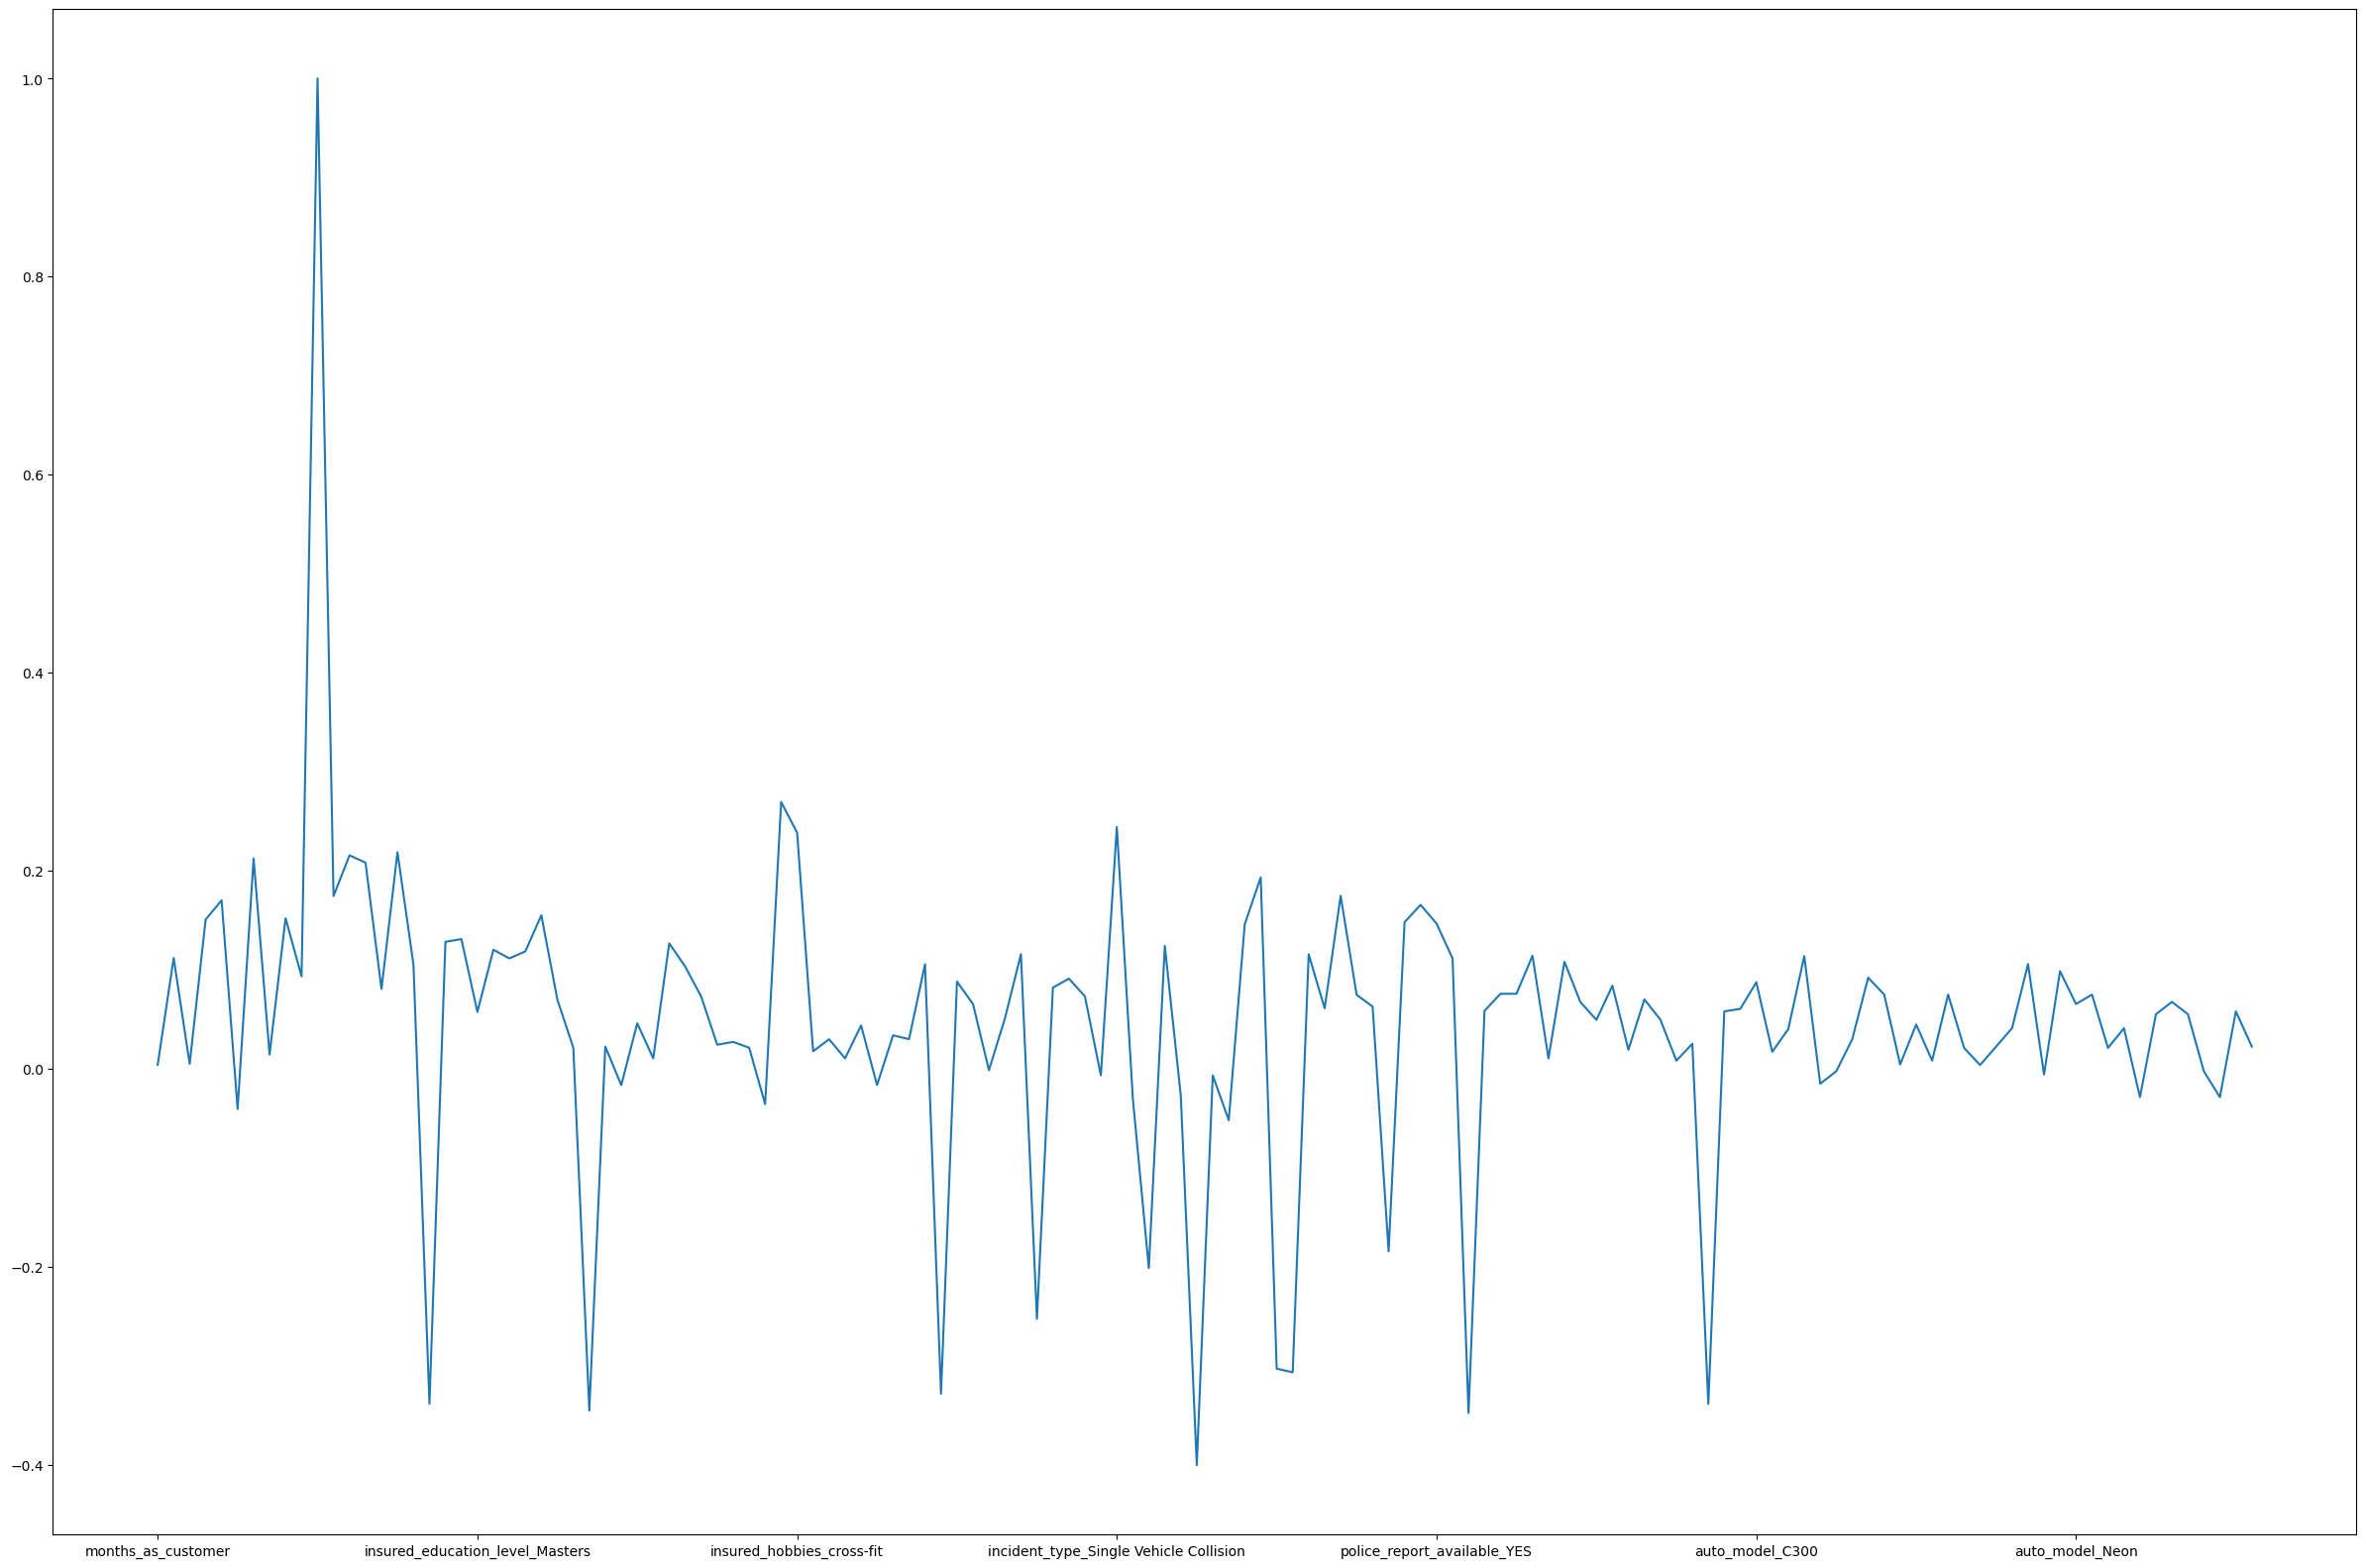

In [14]:
plt.figure(figsize=(30,20))
df.corr()['fraud_reported'].plot()

In [15]:
pd.options.display.max_rows=1074
df[df.columns[0:]].corr()['fraud_reported'][:].sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

fraud_reported                            1.000000
insured_hobbies_chess                     0.269333
incident_type_Single Vehicle Collision    0.244013
insured_hobbies_cross-fit                 0.238269
insured_sex_MALE                          0.218550
policy_state_OH                           0.215415
number_of_vehicles_involved               0.212167
policy_csl_250/500                        0.208049
authorities_contacted_Other               0.193232
incident_state_SC                         0.174555
policy_state_IN                           0.174335
capital_gains                             0.170009
police_report_available_Unknown           0.165411
insured_occupation_exec-managerial        0.154918
witnesses                                 0.151834
umbrella_limit                            0.150591
property_damage_YES                       0.147938
police_report_available_YES               0.146480
authorities_contacted_Fire                0.145732
insured_education_level_MD     

In [16]:
correlated_features = set()
correlation_matrix = df.corr()

In [17]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [18]:
len(correlated_features)

4

In [19]:
print(correlated_features)

{'auto_model_A3', 'auto_make_BMW', 'insured_hobbies_reading', 'collision_type_Unknown'}


In [58]:
columns_to_drop = ['auto_model_A3', 'auto_make_BMW', 'insured_hobbies_reading', 'collision_type_Unknown']
df = df.drop(columns=columns_to_drop)

### Modellisation

In [59]:
df.shape

(1000, 128)

In [60]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [61]:
X.shape

(1000, 127)

In [62]:
y.shape

(1000,)

In [24]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size =0.2,random_state=12)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model_1 = DecisionTreeClassifier(random_state=0)

In [28]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [66]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    CMTD = pd.crosstab(y_test,ypred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(CMTD, 
                xticklabels=['Fraudulant', 'Legit'],
                yticklabels=['Fraudulant', 'Legit'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[157  13]
 [ 13  17]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       170
         1.0       0.57      0.57      0.57        30

    accuracy                           0.87       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.87      0.87      0.87       200



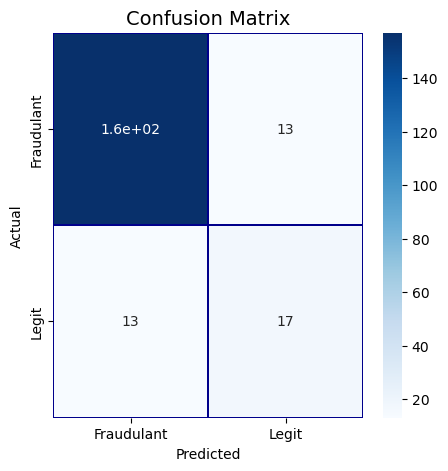

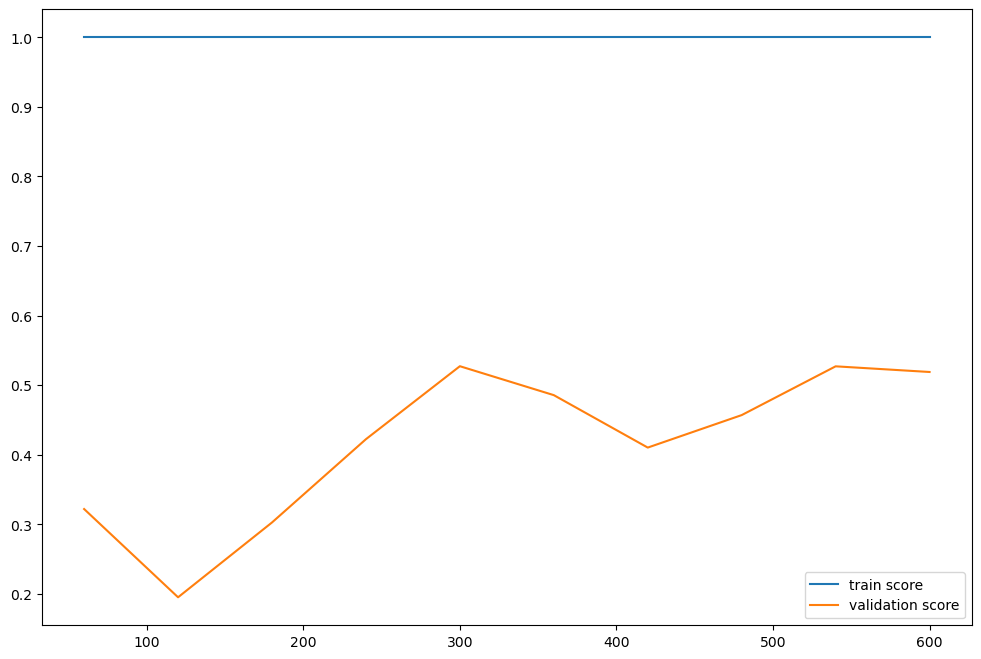

In [67]:
evaluation(model_1)

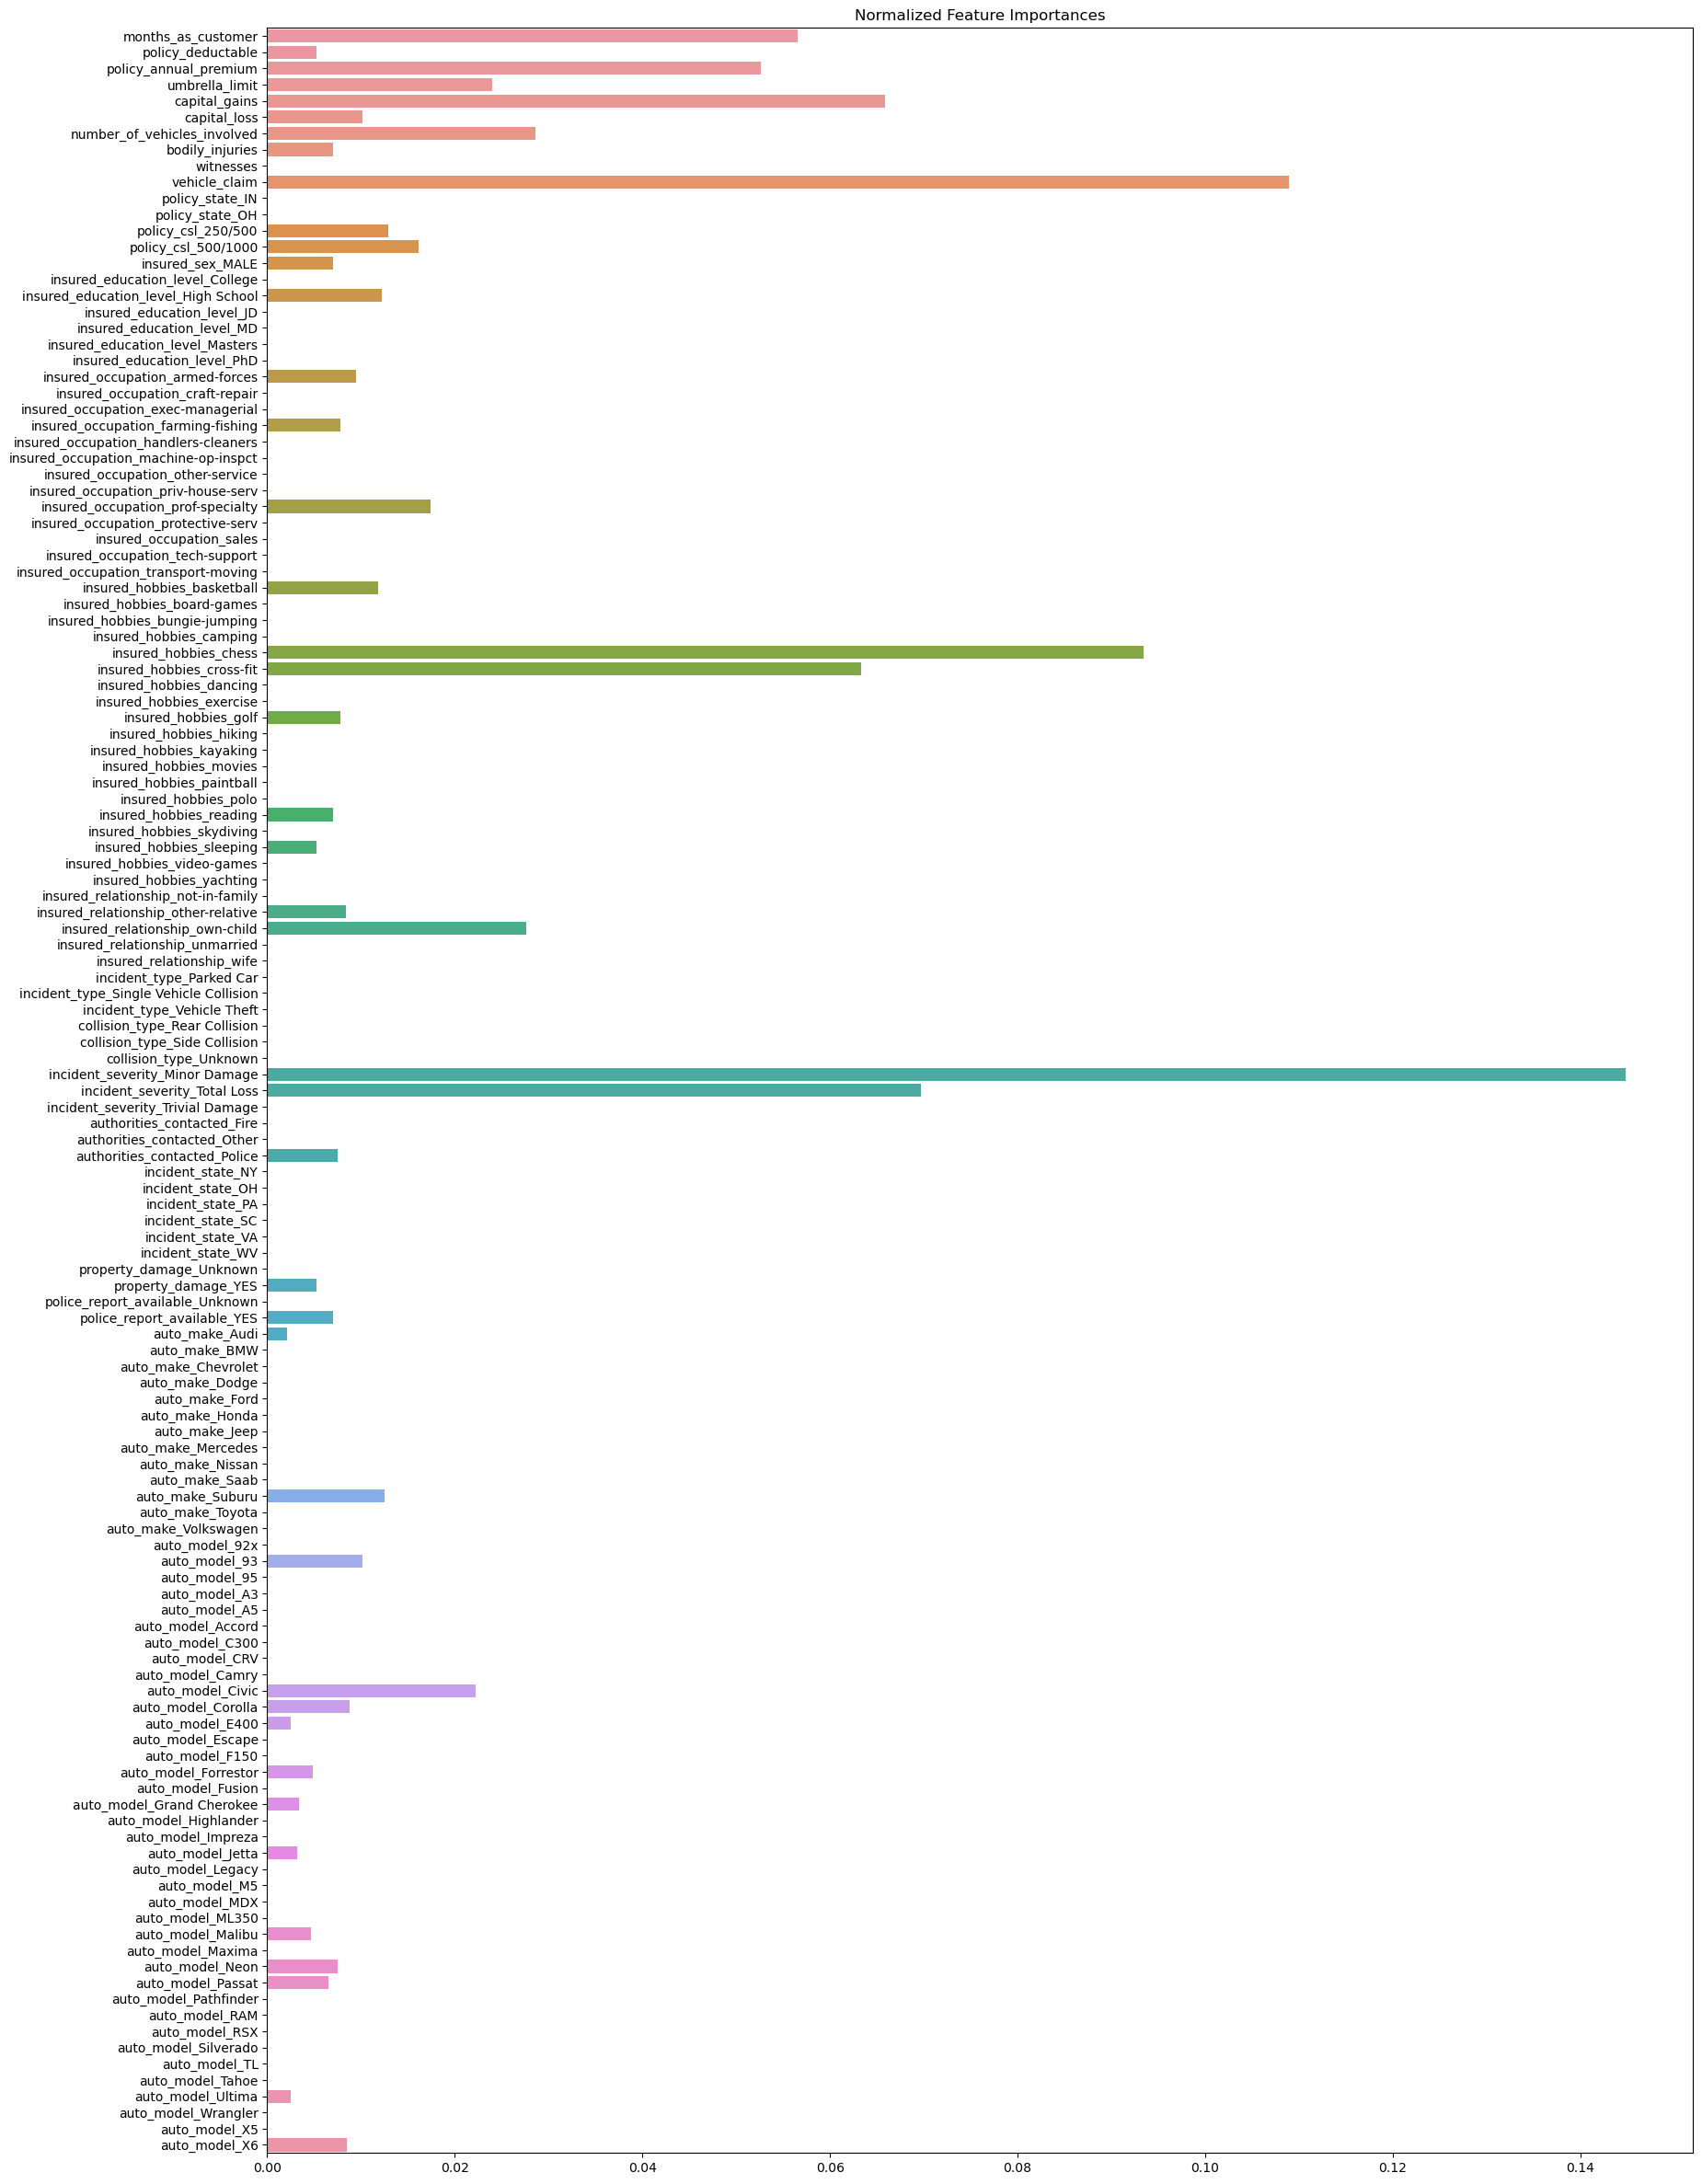

In [54]:
plt.rcParams['figure.figsize'] = 20,30
plt.title('Normalized Feature Importances')
sns.barplot(x = model_1.feature_importances_, y =X_train.columns, orient = 'h')
plt.show()

In [55]:
feature_importances = pd.DataFrame({'Importance Coef' :model_1.feature_importances_ , 'Features' : X_train.columns})
top_features=feature_importances.nlargest(30, 'Importance Coef')

In [56]:
top_features

,Importance Coef,Features
64,0.144789,incident_severity_Minor Damage
9,0.108876,vehicle_claim
38,0.093395,insured_hobbies_chess
65,0.069708,incident_severity_Total Loss
4,0.065817,capital_gains
39,0.063321,insured_hobbies_cross-fit
0,0.056548,months_as_customer
2,0.052592,policy_annual_premium
6,0.028590,number_of_vehicles_involved
55,0.027661,insured_relationship_own-child


In [68]:
df.shape

(1000, 128)

In [69]:
df.to_csv("dataset/insurance_claims_V3.csv", index = False)